In [36]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error as mse 
import seaborn as sns

import numpy as np
from pathlib import Path

color_palette = sns.color_palette()
plt.style.use('fivethirtyeight')

In [37]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [38]:
df.set_index("date", inplace=True)
df.index = pd.to_datetime(df.index)

<AxesSubplot:xlabel='date'>

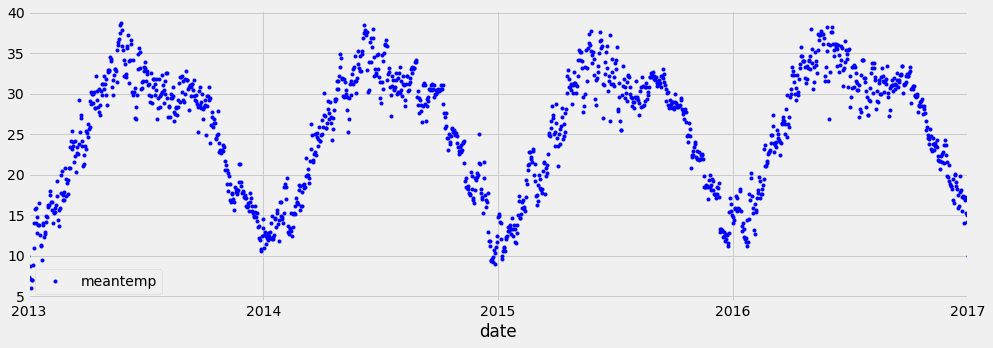

In [39]:
df.plot(y='meantemp', figsize=(15,5), style='.', color='blue')

temp increses as it approaches summer

<AxesSubplot:xlabel='date'>

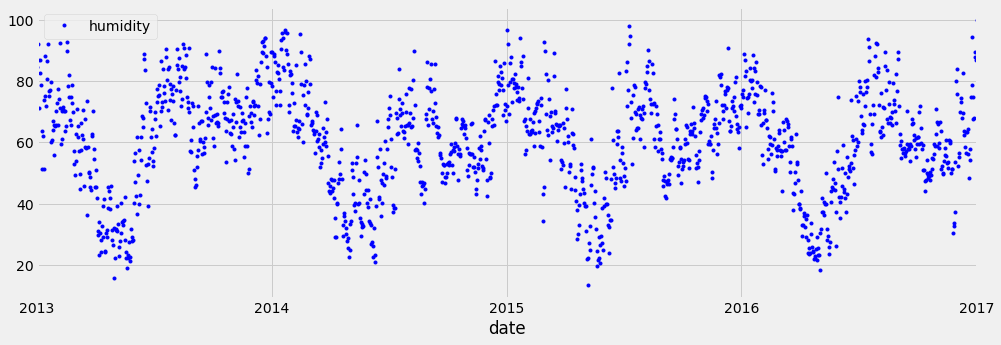

In [40]:
df.plot(y="humidity", figsize=(15,5), style=".", color="blue")

humidity decreases as it approaches summer

<AxesSubplot:xlabel='date'>

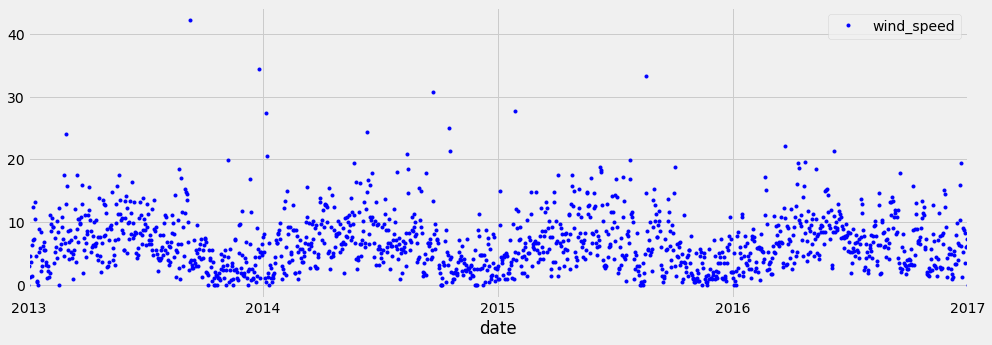

In [41]:
df.plot(y="wind_speed", figsize=(15,5), style=".", color="blue")

wind speed bcm high in mid of the year

<AxesSubplot:xlabel='date'>

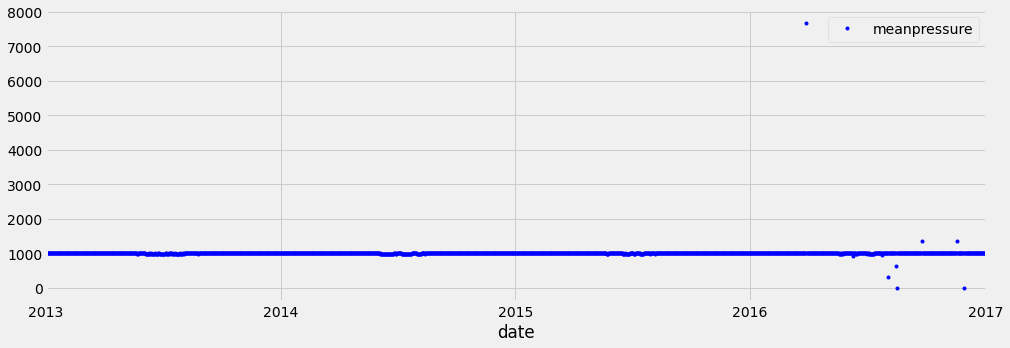

In [42]:
df.plot(y="meanpressure", figsize=(15,5), style=".", color="blue")

mean pressure did not varies minuetely

In [43]:
df['week'] = df.index.isocalendar().week

In [44]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,week
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1


<AxesSubplot:xlabel='week', ylabel='meantemp'>

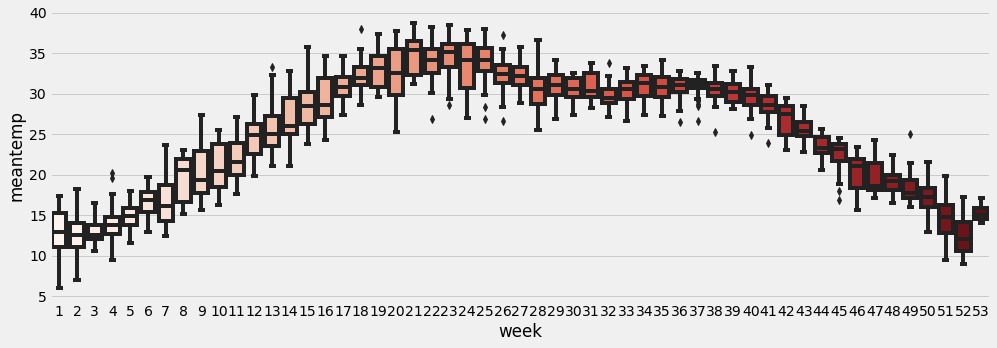

In [45]:

plt.figure(figsize=(15,5))
sns.boxplot(data= df,x='week',y='meantemp', palette='Reds')

<AxesSubplot:xlabel='week', ylabel='humidity'>

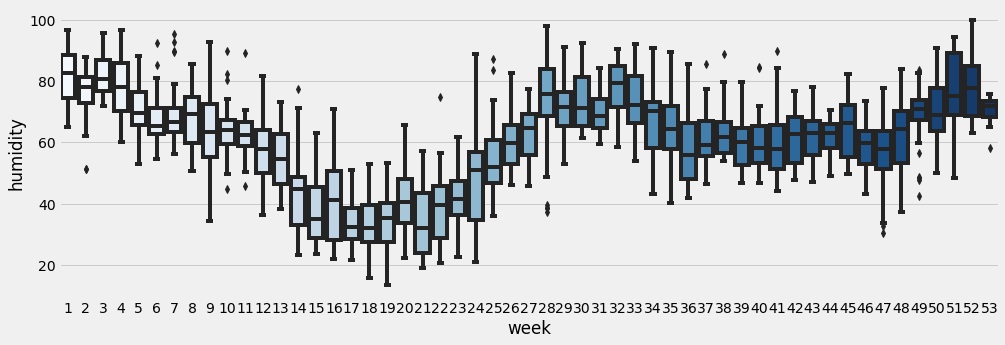

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(data= df,x='week',y='humidity', palette='Blues')

<AxesSubplot:xlabel='week', ylabel='wind_speed'>

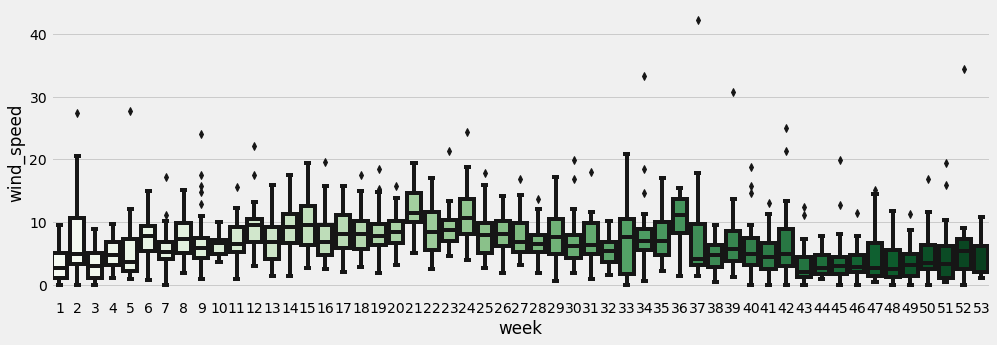

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(data= df,x='week',y='wind_speed', palette='Greens')

this low variation in wind speed make it very hard to predict

<AxesSubplot:xlabel='week', ylabel='meanpressure'>

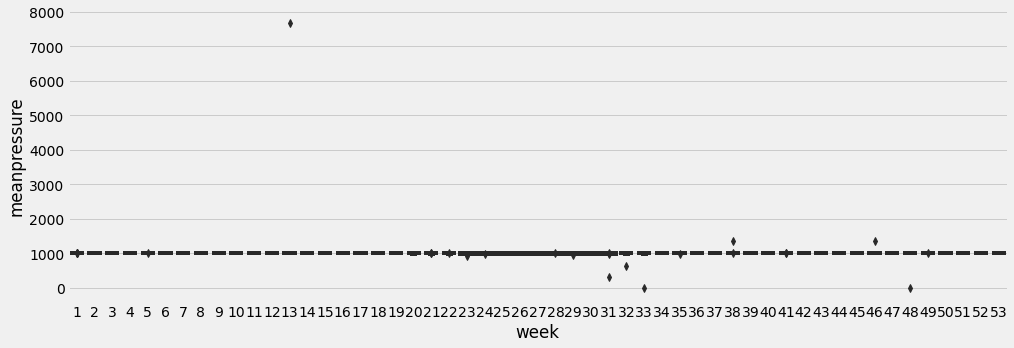

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(data= df,x='week',y='meanpressure', palette='Oranges')

In [49]:
def create_extra_features(df):
    temp = df.copy()
    temp['week'] = temp.index.isocalendar().week
    temp['month'] = temp.index.month
    return temp

df = create_extra_features(df)
df.head()

,meantemp,humidity,wind_speed,meanpressure,week,month
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,1
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,1
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,1
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,1


In [50]:
train = df.loc[df.index < '2016-01-01']
test = df.loc[df.index >= '2016-01-01']

In [51]:
train.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1095, freq=None)

In [52]:
test.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=367, freq=None)

spliting train and test data

In [53]:
def plot_split(name):
    fig, ax = plt.subplots(figsize=(15, 5))
    train.plot(y=name, ax=ax, style='.', color="Orange", title=f'{name} train/test split')
    test.plot(y=name, ax=ax, style='.', color="Green")
    ax.axvline('2016-01-01', color='black', ls='--')
    ax.legend(['Training Set', 'Test Set'])
    plt.show()

This code defines a function called plot_split that creates a plot of a train/test split of a dataset. The function takes one argument, name, which is a string indicating the name of the variable to be plotted.

The function creates a figure with a size of 15 by 5 using fig, ax = plt.subplots(figsize=(15, 5)). Then, it plots the train and test datasets on the same plot using train.plot(y=name, ax=ax, style='.', color="Orange", title=f'{name} train/test split') and test.plot(y=name, ax=ax, style='.', color="Green"). The y parameter specifies the column to be plotted, and ax specifies the axis to use for plotting. The style parameter sets the point marker style, and the color parameter sets the color of the points.

The function also adds a vertical line at the date '2016-01-01' using ax.axvline('2016-01-01', color='black', ls='--'), which can be used to visualize the train-test split. Finally, the function adds a legend to the plot using ax.legend(['Training Set', 'Test Set']) and shows the plot using plt.show().

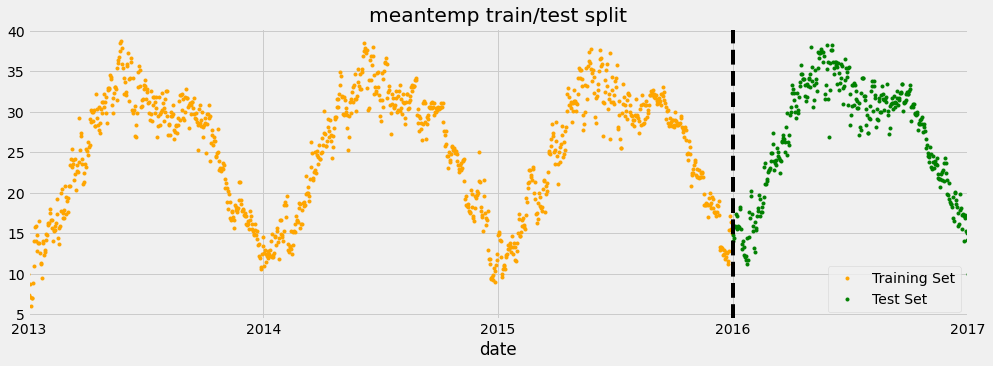

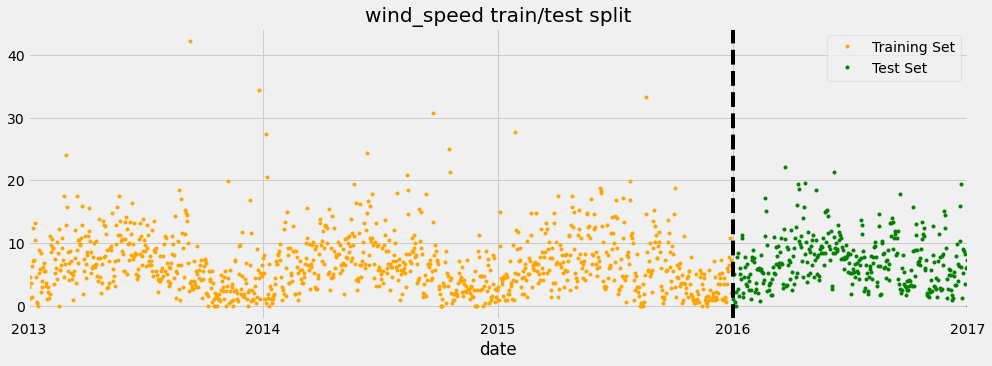

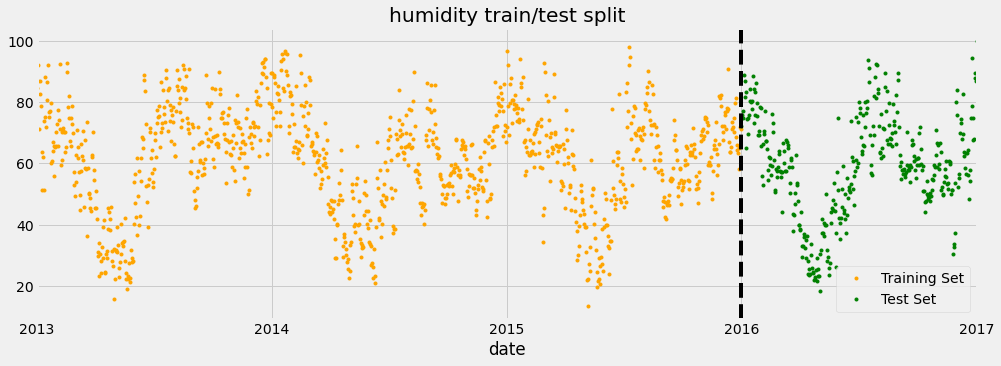

In [54]:
features = ['meantemp', 'wind_speed','humidity']
for f in features:
    plot_split(f)

The first function adjusts the changes the format of the DataFrame to something acceptable by XGBoost (the model we'll be using).

In [55]:
def rectify_format(features, target, train=train,test =test):
    X_train = train[features]
    y_train = train[target]

    X_test = test[features]
    y_test = test[target]

    X_train[features] = X_train[features].astype(np.int64)
    X_test[features] = X_test[features].astype(np.int64)

    return X_train, X_test, y_train, y_test

The second function simply plots the feature importances of the XGBoost Regressor.

In [56]:
def plot_feature_importance(reg):
    feature_importance = pd.DataFrame(reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
    feature_importance.sort_values(by='importance').plot(kind='barh', title='Feature Importances')

In [57]:
def visualize_predictions(original, X_test, model, target):
    preds = X_test.copy()
    preds['Prediction'] = model.predict(X_test)
    
    fig, ax = plt.subplots(figsize=(15, 5))
    original.plot(ax=ax, y=target, color=color_palette[0], title='Predictions Visualized')
    preds.plot(ax=ax, y='Prediction', color=color_palette[2])
    ax.axvline('2016-01-01', color='black', ls='--')
    ax.legend(['actual', 'predicted'])


In [58]:
features = ['week', 'month']
target = 'meantemp'

In [59]:
X_train, X_test, y_train, y_test = rectify_format(features, target)

C:\Users\soura\AppData\Local\Temp\ipykernel_16964\2445330186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = X_train[features].astype(np.int64)
C:\Users\soura\AppData\Local\Temp\ipykernel_16964\2445330186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features] = X_test[features].astype(np.int64)


In [60]:
import xgboost as xgb

mean_temp_reg = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
mean_temp_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:25.31691	validation_1-rmse:27.19442
[100]	validation_0-rmse:9.58052	validation_1-rmse:11.51291
[200]	validation_0-rmse:4.06541	validation_1-rmse:5.93867


[300]	validation_0-rmse:2.41263	validation_1-rmse:4.11609
[400]	validation_0-rmse:2.06098	validation_1-rmse:3.55946
[500]	validation_0-rmse:1.99524	validation_1-rmse:3.39650
[600]	validation_0-rmse:1.97940	validation_1-rmse:3.34393
[700]	validation_0-rmse:1.97268	validation_1-rmse:3.32881
[777]	validation_0-rmse:1.96982	validation_1-rmse:3.33008


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

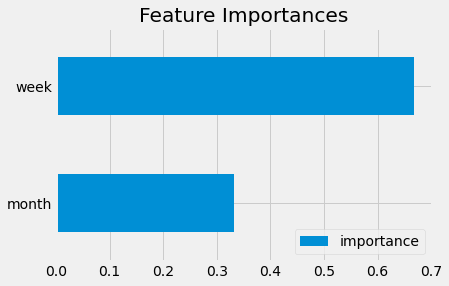

In [61]:
plot_feature_importance(mean_temp_reg)

<h1>Prediction Visualization

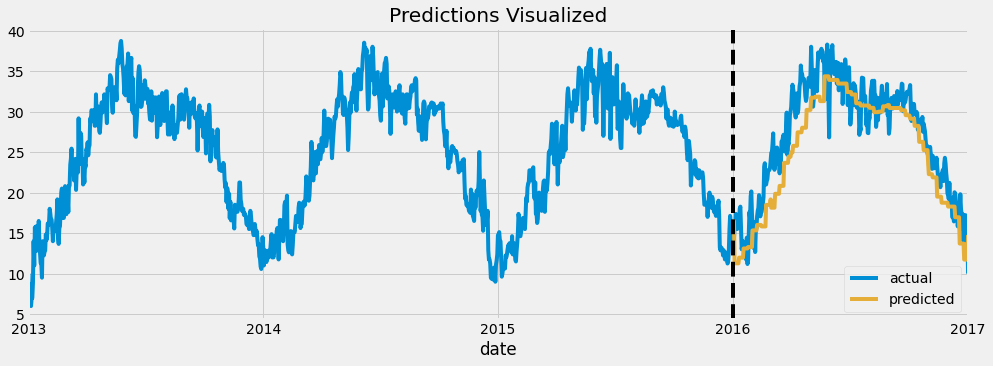

In [62]:
visualize_predictions(df, X_test, mean_temp_reg, target)

<h1> Training and testing Humidity

In [69]:
target = 'humidity'
X_train, X_test, y_train, y_test = rectify_format(features, target)

humidity_reg = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
humidity_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:62.57332	validation_1-rmse:60.06522


C:\Users\soura\AppData\Local\Temp\ipykernel_16964\2445330186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = X_train[features].astype(np.int64)
C:\Users\soura\AppData\Local\Temp\ipykernel_16964\2445330186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features] = X_test[features].astype(np.int64)


[100]	validation_0-rmse:25.30045	validation_1-rmse:23.12891
[200]	validation_0-rmse:13.78254	validation_1-rmse:12.52524
[300]	validation_0-rmse:11.19531	validation_1-rmse:10.92450
[400]	validation_0-rmse:10.70709	validation_1-rmse:10.90075
[401]	validation_0-rmse:10.70531	validation_1-rmse:10.90218


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

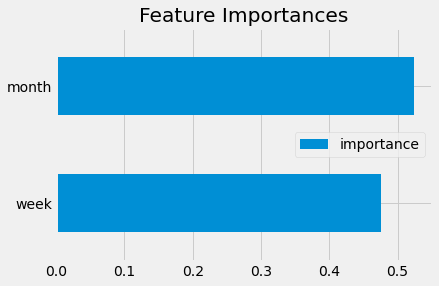

In [70]:
plot_feature_importance(humidity_reg)

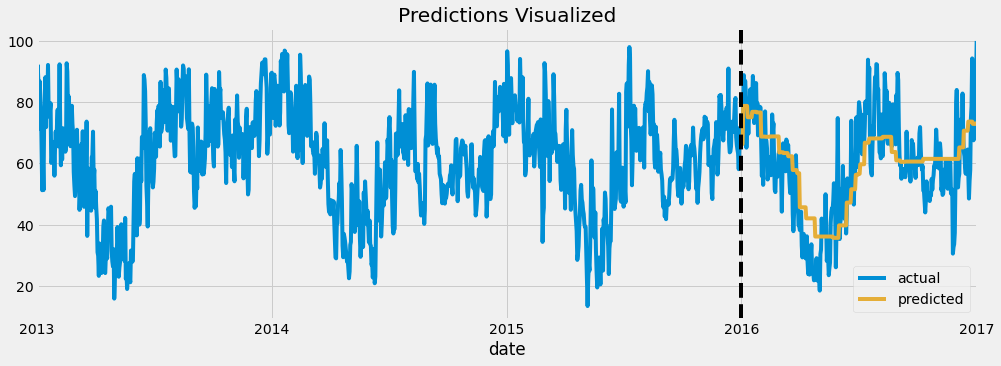

In [71]:
visualize_predictions(df, X_test, humidity_reg, target)

<h1> Training and testing WindSpped

In [72]:
target = 'wind_speed'
X_train, X_test, y_train, y_test = rectify_format(features, target)
ws_reg = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)
ws_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

[0]	validation_0-rmse:7.73306	validation_1-rmse:7.70018


C:\Users\soura\AppData\Local\Temp\ipykernel_16964\2445330186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = X_train[features].astype(np.int64)
C:\Users\soura\AppData\Local\Temp\ipykernel_16964\2445330186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features] = X_test[features].astype(np.int64)


[100]	validation_0-rmse:4.88358	validation_1-rmse:4.73366
[200]	validation_0-rmse:4.31749	validation_1-rmse:4.10526
[300]	validation_0-rmse:4.20441	validation_1-rmse:3.98387
[400]	validation_0-rmse:4.16886	validation_1-rmse:3.96126
[500]	validation_0-rmse:4.14614	validation_1-rmse:3.95820
[532]	validation_0-rmse:4.13979	validation_1-rmse:3.95976


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

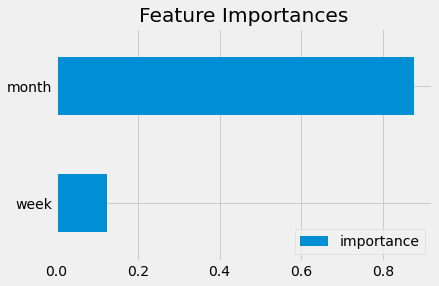

In [73]:
plot_feature_importance(ws_reg)

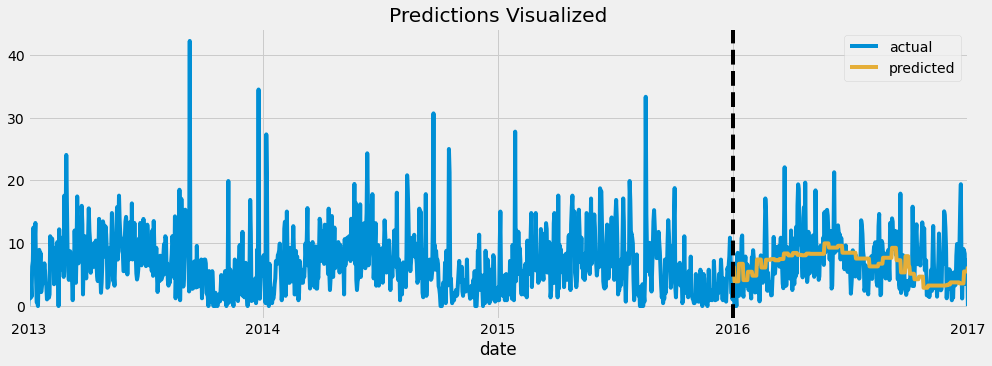

In [74]:
visualize_predictions(df, X_test, ws_reg, target)

<h1>Future Forecasting

In [63]:
def get_template(start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date, freq='1d')
    return pd.DataFrame(index=date_range, columns=['week', 'month', 'quarter'])

In [64]:
df_future = get_template('2017-01-01', '2018-01-01')
df.head(3)

,meantemp,humidity,wind_speed,meanpressure,week,month
date,,,,,,
2013-01-01,10.000000,84.5,0.000000,1015.666667,1,1
2013-01-02,7.400000,92.0,2.980000,1017.800000,1,1
2013-01-03,7.166667,87.0,4.633333,1018.666667,1,1


In [65]:
df_future['week'] = (df_future.index.isocalendar().week).astype(np.int64)
df_future['month'] = df_future.index.month
df_future['quarter'] = df_future.index.quarter

In [76]:
df_future['meantemp'] = mean_temp_reg.predict(df_future[features])
df_future['wind_speed'] = ws_reg.predict(df_future[features])
df_future['humidity'] = humidity_reg.predict(df_future[features])

In [78]:
def plot_all(col_name, df_past=df, df_future=df_future):
    fig, ax = plt.subplots(figsize=(15, 5))
    df_past.plot(y=col_name, ax=ax, color=color_palette[0])
    df_future.plot(y=col_name, ax=ax, color=color_palette[2])
    ax.axvline('2017-01-01', ls='--', color='black')
    ax.legend(['past', 'future'])


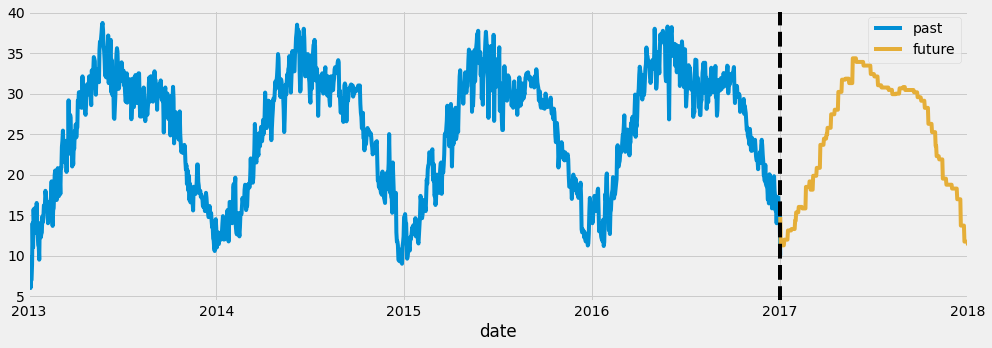

In [79]:
plot_all('meantemp')

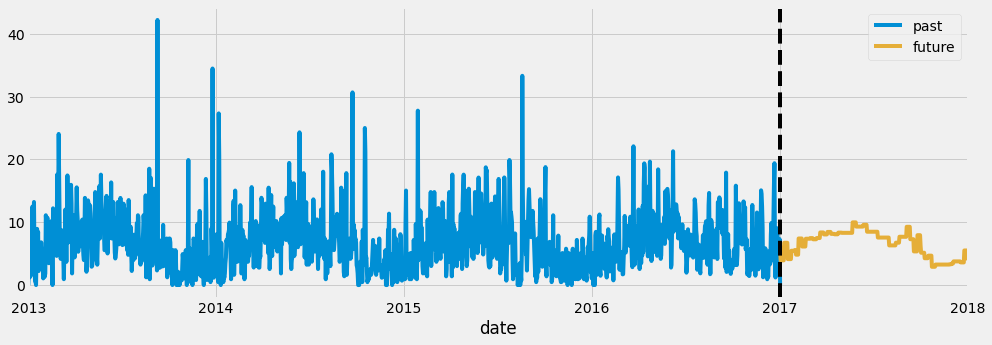

In [80]:
plot_all('wind_speed')

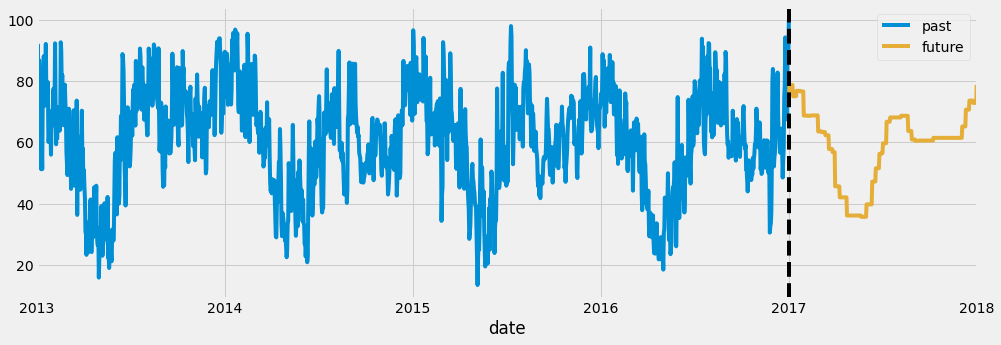

In [81]:
plot_all('humidity')